In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import yaml
plt.style.use("../science.mplstyle")

from helpers.plotting import feature_labels, feature_bins

In [2]:
with open("workflow.yaml", "r") as file:
    workflow = yaml.safe_load(file)
    
project_id = "lowmass"
particle_type = "upsilon"
data_id = "skimmed_data_2016H_30555"


path_to_data_dir = workflow["file_paths"]["data_storage_dir"]
path_to_data = f"{path_to_data_dir}/compiled_data/{project_id}"

with open(f"{path_to_data}/{data_id}_nojet", "rb") as input_file:
        all_data = pickle.load(input_file)


In [3]:
trigger_list = [x for x in all_data.keys() if (("HLT" in x) and ("samesign" not in x))]
#print(trigger_list)

all_events_OS = len(all_data["dimu_mass"])
all_events_SS = len(all_data["dimu_mass_samesign"])

num_pass = []
percent_pass = []

for trig in trigger_list:
    masses_OS = all_data["dimu_mass"]
    masses_SS = all_data["dimu_mass_samesign"]
    num_events_pass_OS = len(masses_OS[all_data[trig]])
    num_pass.append(num_events_pass_OS)
    percent_pass.append(round(100*num_events_pass_OS/all_events_OS, 2))
    
indices = np.argsort(percent_pass)


In [4]:
for i in indices[::-1]:
    
    line = trigger_list[i] + ": " + str(num_pass[i]) + " pass , "+  str(percent_pass[i])+"%"
    print(line)

HLT_TkMu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ: 13145418 pass , 60.29%
HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ: 12596273 pass , 57.77%
HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ: 12348100 pass , 56.63%
HLT_Mu30_TkMu11: 8182538 pass , 37.53%
HLT_Mu40_TkMu11: 5718117 pass , 26.23%
HLT_Mu27_TkMu8: 5133996 pass , 23.55%
HLT_DoubleMu33NoFiltersNoVtx: 3714910 pass , 17.04%
HLT_L2DoubleMu28_NoVertex_2Cha_Angle2p5_Mass10: 3040504 pass , 13.94%
HLT_TripleMu_5_3_3_DZ_Mass3p8: 2523028 pass , 11.57%
HLT_DoubleMu38NoFiltersNoVtx: 2308058 pass , 10.59%
HLT_L2DoubleMu38_NoVertex_2Cha_Angle2p5_Mass10: 1472489 pass , 6.75%
HLT_TripleMu_12_10_5: 1140613 pass , 5.23%
HLT_DoubleMu8_Mass8_PFHT300: 974960 pass , 4.47%
HLT_Mu20_Mu10: 683876 pass , 3.14%
HLT_TkMu17_TrkIsoVVL_TkMu8_TrkIsoVVL: 680116 pass , 3.12%
HLT_Mu20_Mu10_DZ: 655966 pass , 3.01%
HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL: 653812 pass , 3.0%
HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL: 632767 pass , 2.9%
HLT_TrkMu15_DoubleTrkMu5NoFiltersNoVtx: 557181 pass , 2.56%
HLT_Mu17_Mu

# Triggering studies

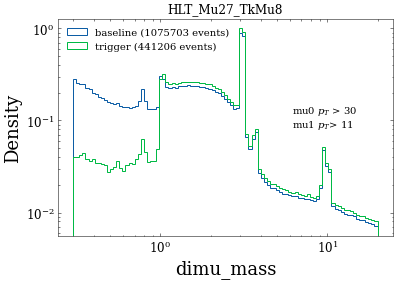

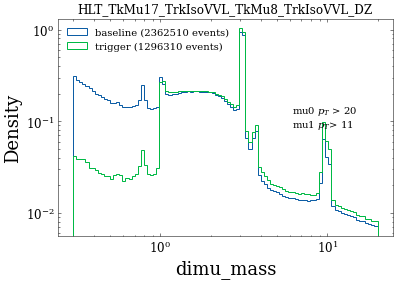

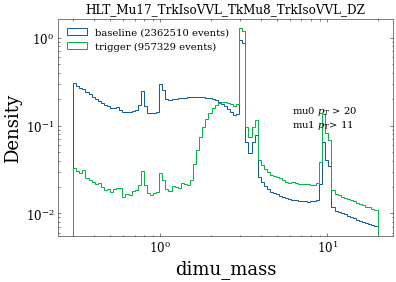

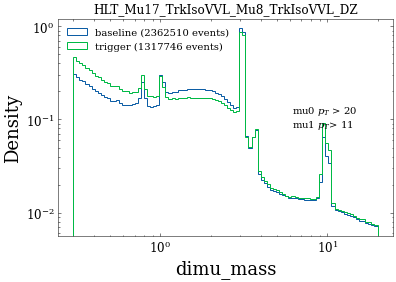

In [5]:
SB_left = 0.3#float(workflow["window_definitions"][particle_type]["SB_left"])
SR_left = 0.3#float(workflow["window_definitions"][particle_type]["SR_left"])
SR_right = 20#float(workflow["window_definitions"][particle_type]["SR_right"])
SB_right = 20#float(workflow["window_definitions"][particle_type]["SB_right"])





triggers = ["HLT_Mu27_TkMu8","HLT_TkMu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ","HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ","HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ"]
# too small: "HLT_DoubleMu33NoFiltersNoVtx", "HLT_Mu17_Mu8","HLT_Mu20_Mu10"
# weird shoulder: "HLT_Mu27_TkMu8", "HLT_TkMu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ","HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ"

pt_cuts = [[30,11],[20,11],[20,11],[20,11]]
for i, trig in enumerate(triggers):
    
    
    pt_high_cut = pt_cuts[i][0]
    pt_low_cut = pt_cuts[i][1]
    
    in_SB = (all_data["dimu_mass"] >= SB_left) & (all_data["dimu_mass"] <= SB_right)& (all_data["mu0_pt"] >= pt_high_cut)& (all_data["mu1_pt"] >= pt_low_cut)& (np.abs(all_data["mu0_eta"]) <= 2.1)& (np.abs(all_data["mu1_eta"]) <= 2.1)

    
    vars_to_plot = ["dimu_mass"]#, "dimu_pt", "mu0_pt", "mu1_pt","mu0_eta","mu0_eta"]
    bins = {
        "dimu_mass": np.logspace(np.log10(0.3), np.log10(20),100), 
         "dimu_pt": np.linspace(0, 100,60), 
         "mu0_pt": np.linspace(0, 50, 60), 
        "mu1_pt": np.linspace(0, 50, 60) ,
        "mu0_eta": np.linspace(-3, 3, 60), 
           "mu1_eta": np.linspace(-3, 3, 60), }
    

    
    
    for var in vars_to_plot:

        events_all = all_data[var][in_SB]
        events_trig = all_data[var][in_SB][all_data[trig][in_SB]]

        plt.figure()
        plt.hist(events_all, bins = bins[var], label = f"baseline ({len(events_all)} events)", histtype = "step", density = True)
        plt.hist(events_trig, bins = bins[var], label = f"trigger ({len(events_trig)} events)", histtype = "step", density = True)
        label = f"mu0 $p_T$ > {pt_high_cut}\nmu1 $p_T$> {pt_low_cut}"
        plt.text(0.7, 0.5, label, transform = plt.gca().transAxes)
        plt.xscale("log")
        plt.yscale("log")
        plt.ylabel("Density")
        plt.legend()
        plt.xlabel(var)
        plt.title(trig)
        plt.show()
    
    
    
    
   

# Various kinematic observables

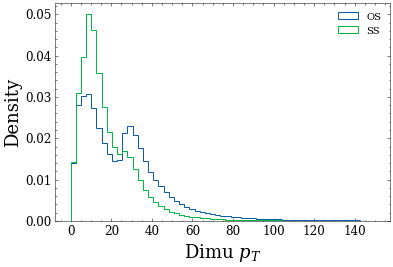

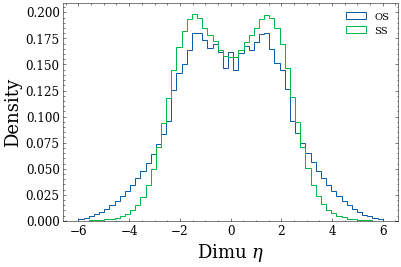

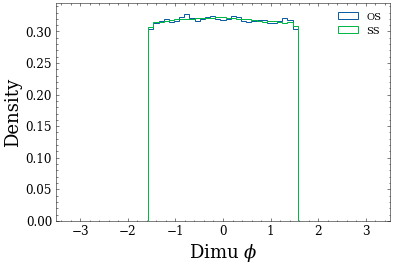

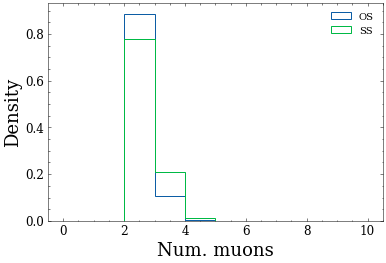

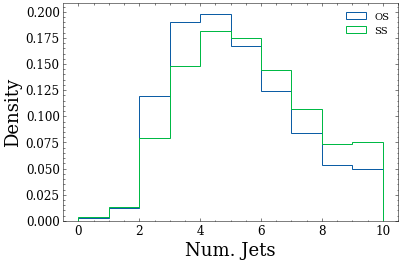

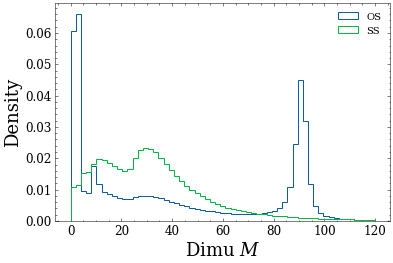

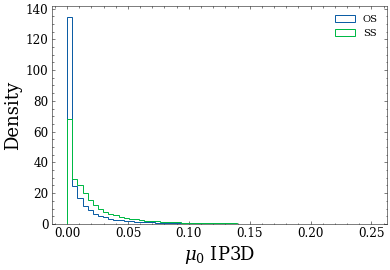

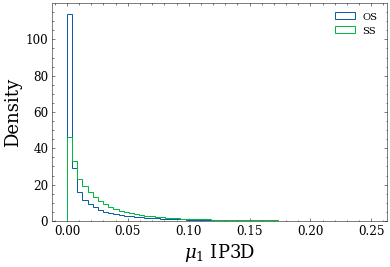

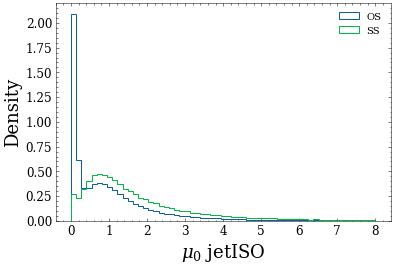

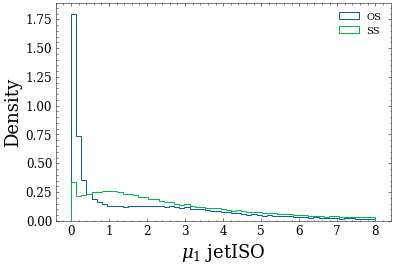

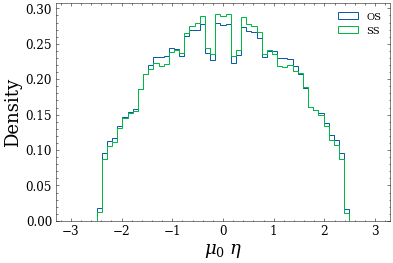

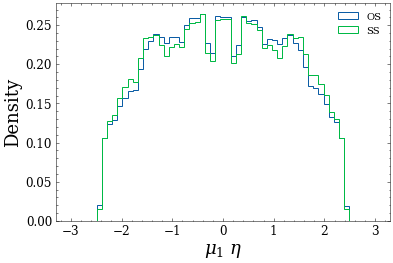

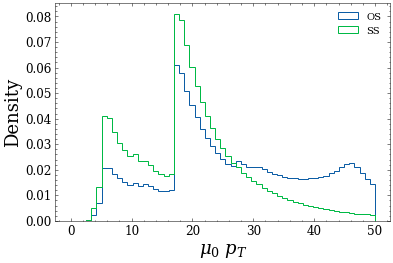

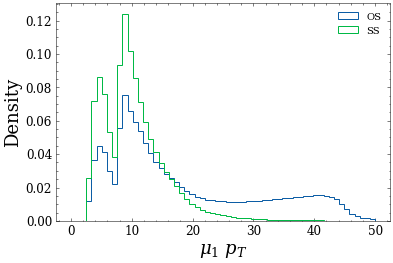

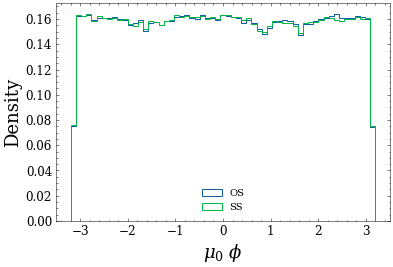

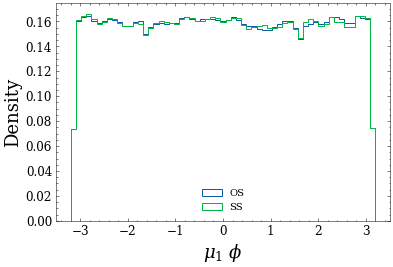

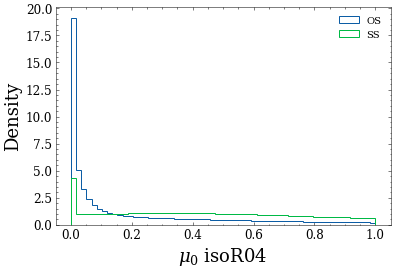

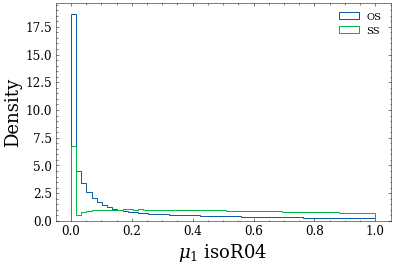

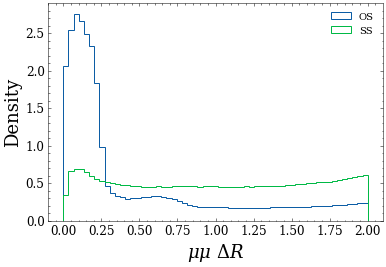

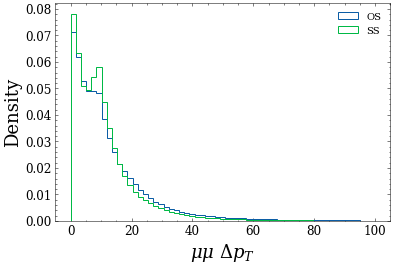

In [6]:
vars_to_plot = all_data.keys()

for var in vars_to_plot:
    
    if ("samesign" not in var) and ("HLT" not in var):
    
        plt.figure()
        plt.hist(all_data[var], bins = feature_bins[var], histtype = "step", density = True, label = "OS")
        plt.hist(all_data[var+"_samesign"], bins = feature_bins[var], histtype = "step", density = True, label = "SS")
        plt.xlabel(feature_labels[var])
        plt.ylabel("Density")
        plt.legend()
        plt.show()


Look at the samesign dimuon mass spectrum

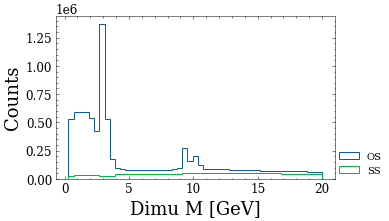

In [7]:
plt.figure(figsize = (5,3))

plt.hist(all_data["dimu_mass"], bins = np.linspace(SB_left, SB_right, 50), histtype = "step", label = f"OS")
plt.hist(all_data["dimu_mass_samesign"], bins = np.linspace(SB_left, SB_right, 50), histtype = "step", label = f"SS")


plt.xlabel("Dimu M [GeV]")
plt.ylabel("Counts")
plt.legend(loc = (1, 0))
plt.show()

